## Keras plus TensorFlow
### Installation Instructions
* TensorFlow (not GPU) https://www.tensorflow.org/install/install_windows
* Keras https://keras.io/#installation
### Task: There are diabetics dataset example. Do the same with Iris dataset or your project data


### Codebook
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [1]:
# Create first network with Keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

In [2]:
from sklearn.datasets import load_iris

In [3]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
X = load_iris()['data']
y = load_iris()['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [5]:
y = to_categorical(y)
y_true = y_test.copy()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

seed = 10
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(12, input_dim=4, init='random_uniform', activation='relu'))
model.add(Dense(8, init='random_uniform', activation='relu'))
model.add(Dense(3, init='random_uniform', activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=40,  verbose=1)
# calculate predictions
predictions = model.predict(X_train)

/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=4, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="random_uniform")`


Epoch 1/50
100/100 [==============================] - 0s - loss: 1.0988 - acc: 0.3400     
Epoch 2/50
100/100 [==============================] - 0s - loss: 1.0986 - acc: 0.3400     
Epoch 3/50
100/100 [==============================] - 0s - loss: 1.0986 - acc: 0.3400     
Epoch 4/50
100/100 [==============================] - 0s - loss: 1.0985 - acc: 0.3400     
Epoch 5/50
100/100 [==============================] - 0s - loss: 1.0984 - acc: 0.3400     
Epoch 6/50
100/100 [==============================] - 0s - loss: 1.0984 - acc: 0.3400     
Epoch 7/50
100/100 [==============================] - 0s - loss: 1.0983 - acc: 0.3400     
Epoch 8/50
100/100 [==============================] - 0s - loss: 1.0981 - acc: 0.3400     
Epoch 9/50
100/100 [==============================] - 0s - loss: 1.0979 - acc: 0.3400     
Epoch 10/50
100/100 [==============================] - 0s - loss: 1.0977 - acc: 0.3400     
Epoch 11/50
100/100 [==============================] - 0s - loss: 1.0974 - acc: 0.3400   

In [7]:
a = model.predict_classes(np.array(X_test))

32/50 [==================>...........] - ETA: 0s

In [8]:
y_true

array([1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2])

In [9]:
a

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2])

In [10]:
cols = []
for i in range(len(a)):
    if(a[i] == y_true[i]):
        cols.append('green')
    else:
        cols.append('red')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

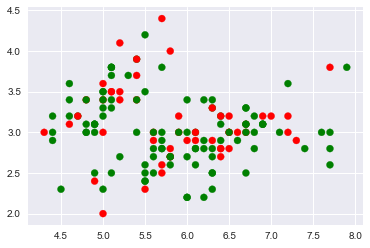

In [12]:
plt.scatter(X[:,0], X[:,1], c=cols)
plt.show()

In [13]:
f = {}
for i in range(len(a)):
    if(a[i] not in f.keys()):
        f[a[i]] = {}
    if(a[i] != y_true[i]):
        if(y_true[i] not in f[a[i]].keys()):
            f[a[i]][y_true[i]] = 0
        f[a[i]][y_true[i]] += 1 

In [14]:
f

{0: {1: 3}, 2: {1: 14}}

In [15]:
from sklearn.metrics import classification_report

In [26]:
ans = [{},{},{}]
predicted = a.copy()

for i in range(3):
    for j in range(3):
        ans[i][j] = 0

for i in range(len(predicted)):
    ans[y_true[i]][predicted[i]] = ans[y_true[i]][predicted[i]] + 1
print(ans)

[{0: 16, 1: 0, 2: 0}, {0: 3, 1: 0, 2: 14}, {0: 0, 1: 0, 2: 17}]


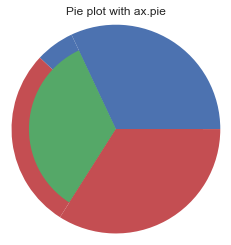

In [32]:
from matplotlib import pyplot as plt
import numpy as np

a1 = f[0]

vals = np.array([[ans[0][0], ans[0][1], ans[0][2]], [ans[1][0], ans[1][1], ans[1][2]], [ans[2][0], ans[2][1], ans[2][2]]])
fig, ax = plt.subplots()
ax.pie(vals.flatten(), radius=1.2,
       colors=plt.rcParams["axes.prop_cycle"].by_key()["color"][:vals.shape[1]])
ax.pie(vals.sum(axis=1), radius=1)
ax.set(aspect="equal", title='Pie plot with ax.pie')

plt.show()